In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *

In [2]:
CYCLE_LENGTH = 10 # length of the cycles to fit onto the graph

In [3]:
g = graphs.Balaban10Cage(embedding=1)

In [4]:
cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]

In [ ]:
# solution = [
#     [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0],
#     [22, 23, 24, 51, 50, 67, 66, 33, 32, 31, 22],
#     [8, 9, 10, 19, 18, 17, 16, 25, 26, 27, 8],
#     [20, 45, 44, 43, 42, 41, 40, 39, 38, 21, 20],
#     [0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0],
#     [0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0],
#     [11, 12, 41, 42, 59, 58, 49, 50, 51, 52, 11],
#     [5, 6, 7, 8, 27, 28, 69, 68, 39, 40, 5],
#     [7, 48, 47, 14, 15, 36, 35, 34, 9, 8, 7],
#     [23, 62, 61, 60, 59, 42, 43, 26, 25, 24, 23],
#     [3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3],
#     [18, 19, 20, 21, 22, 31, 30, 29, 56, 57, 18],
#     [26, 43, 44, 65, 64, 55, 56, 29, 28, 27, 26],
#     [1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1],
#     [2, 53, 54, 37, 36, 15, 16, 17, 4, 3, 2] ,
# ]
solution = [
    [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0], 
    [0, 61, 62, 23, 22, 31, 30, 29, 28, 69, 0], 
    [0, 69, 68, 67, 66, 65, 44, 45, 46, 1, 0], 
    [1, 46, 47, 48, 49, 50, 51, 52, 53, 2, 1], 
    [4, 17, 16, 25, 24, 23, 62, 63, 6, 5, 4], 
]

In [ ]:
# only valid cycles and no duplicates edges
edges = set()
for c in solution:
    for i in range(CYCLE_LENGTH):
        if (c[i], c[i + 1]) in edges:
            print("Duplicate edge", c[i], c[i + 1])
        edges.add((c[i], c[i + 1]))
    assert c in cycles

In [ ]:
# print cycles with the same vertex set in the solution
for i, c1 in enumerate(solution):
    for j, c2 in enumerate(solution):
        if i == j:
            continue
        if list(reversed(c1)) == c2:
            continue
        if set(c1) == set(c2):
            print(c1, c2)

In [ ]:
def x_in_y(query, base):
    try:
        l = len(query)
    except TypeError:
        l = 1
        query = type(base)((query,))

    for i in range(len(base)):
        if base[i:i+l] == query:
            return True
    return False

# test cases 
assert x_in_y((1, 2, 3), (1, 2, 3, 4))
assert x_in_y((1, 2, 3), (4, 1, 2, 3))
assert not x_in_y((1, 2, 3), (1, 2, 4, 3))
assert x_in_y([0, 61, 60], [0, 61, 60, 59, 42, 41, 40, 39, 68, 69, 0])

In [ ]:
# make sure if vertices i, j, k occur in the solution, k, j, i don't
for c in solution:
    c = c.copy() + [c[1]]
    for i in range(CYCLE_LENGTH):
        for c2 in solution:
            c2 = c2.copy() + [c2[1]]
            if x_in_y([c[i + 2], c[i + 1], c[i]], c2):
                print("Found", c[i], c[i + 1], c[i + 2], "in", c2)

# Tests for mixed cycle length fittings:

In [5]:
mixed = [
    [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0],
    [22, 23, 24, 51, 50, 67, 66, 33, 32, 31, 22],
    [15, 16, 25, 26, 43, 42, 59, 60, 35, 36, 15],
    [5, 6, 63, 62, 23, 22, 21, 38, 39, 40, 5],
    [7, 48, 47, 14, 15, 36, 37, 38, 21, 20, 19, 10, 9, 8, 7],
    [0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0],
    [6, 7, 8, 27, 28, 69, 68, 39, 38, 37, 54, 55, 64, 63, 6],
    [1, 46, 45, 20, 21, 22, 31, 30, 29, 56, 55, 54, 53, 2, 1],
    [18, 19, 20, 45, 44, 65, 64, 55, 56, 57, 18],
    [3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3],
    [9, 10, 11, 52, 53, 54, 37, 36, 35, 34, 9],
    [0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0],
    [4, 17, 18, 57, 58, 49, 48, 7, 6, 5, 4],
    [23, 62, 61, 60, 59, 58, 57, 56, 29, 28, 27, 26, 25, 24, 23],
    [11, 12, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 11],
    [10, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
    [2, 53, 52, 51, 24, 25, 16, 17, 4, 3, 2],
    [8, 9, 34, 33, 66, 65, 44, 43, 26, 27, 8],
    [39, 68, 67, 50, 49, 58, 59, 42, 41, 40, 39],
]

In [6]:
len(mixed)

19

In [7]:
max([len(c) - 1 for c in mixed])

14

In [8]:
sum([len(c) - 1 for c in mixed])

210

In [9]:
len([c for c in mixed if len(c) == 11])

14

In [10]:
vertex_uses = [0] * 70
for c in mixed:
    for v in c[:-1]:
        vertex_uses[v] += 1
print(vertex_uses)
if all([v == 3 for v in vertex_uses]):
    print("All vertices used thrice")

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
All vertices used thrice


In [11]:
# convert edges list to adjacency list
adjacency_list = [[] for _ in range(70)]
for e in g.edges():
    adjacency_list[e[0]].append(e[1])
    adjacency_list[e[1]].append(e[0])

# check if every edge is used exactly once by removing them from the adjacency list
for c in mixed:
    for i in range(len(c) - 1):
        if c[i + 1] not in adjacency_list[c[i]]:
            print("Edge", c[i], c[i + 1], "not in adjacency list")
        adjacency_list[c[i]].remove(c[i + 1])
if all([len(v) == 0 for v in adjacency_list]):
    print("All edges used exactly once")

All edges used exactly once


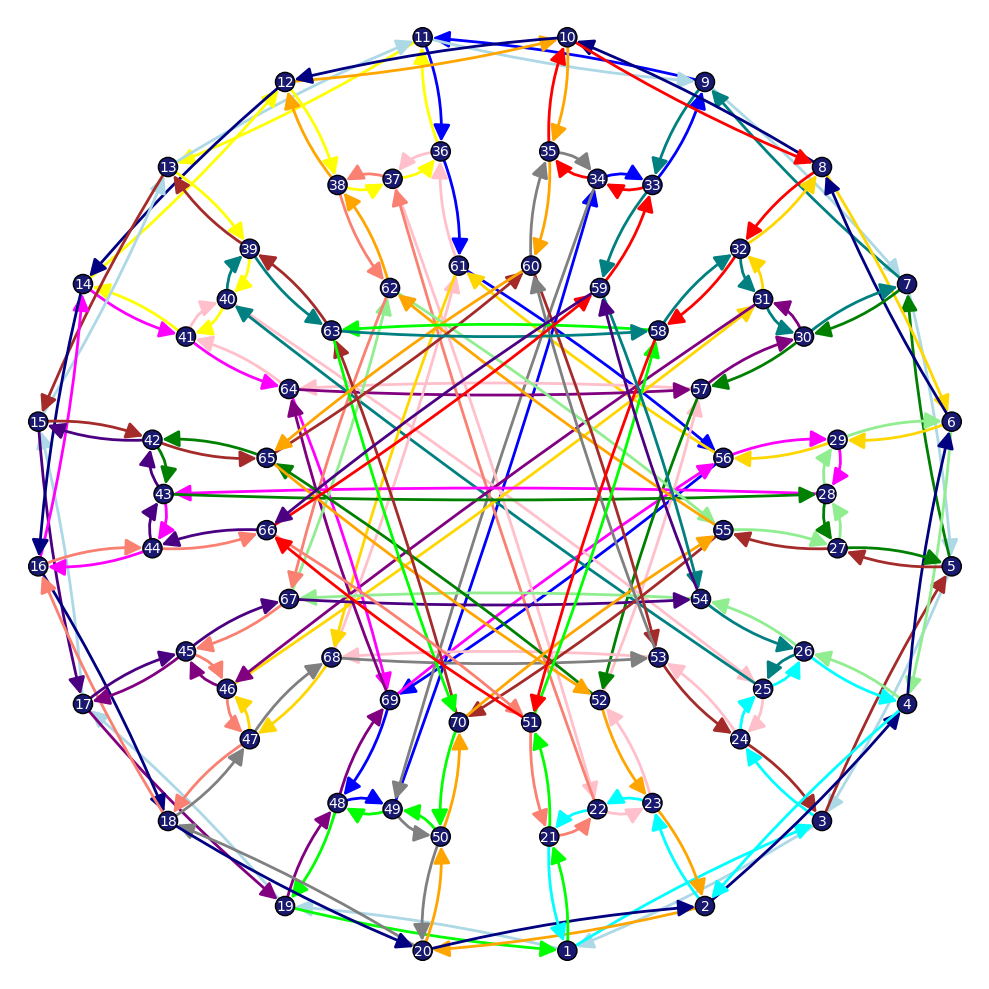

In [24]:
from math import pi, cos, sin

embedding = 1 # 1 or 2
g_directed = graphs.Balaban10Cage(embedding=embedding).to_directed()

def is_in_cycle(e, cycle):
    try:
        i = cycle.index(e[0])
        j = cycle.index(e[1])

        if i + 1 == j or (i == len(cycle) - 2 and j == 0):
            return True
        else:
            return False
    except ValueError:
        return False

for e in g_directed.edges():
    g_directed.set_edge_label(e[0], e[1], 0)
    for i, c in enumerate(mixed):
        if is_in_cycle(e, c):
            g_directed.set_edge_label(e[0], e[1], i + 1)

### CHANGE EMBEDDING LAYOUT ###
pos = g_directed.get_pos()
relabels = {}

inner_vertices = [2, 48, 27, 31, 38, 42, 49, 53, 32, 8, 43, 21, 54, 58, 7, 3, 22, 26, 59, 37]
new_labels = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
for i, v in enumerate(inner_vertices):
    angle = 2 * pi * (i + 5.5) / len(inner_vertices)
    pos[v] = (3 * cos(angle), 3 * sin(angle))
    relabels[v] = new_labels[i]

indented_vertices = [5, 24, 35, 46, 29, 40, 51, 34, 45, 56]
new_labels = [28, 31, 34, 37, 40, 43, 46, 49, 22, 25]
for i, v in enumerate(indented_vertices):
    angle = 2 * pi * i / len(indented_vertices)
    pos[v] = (4.3 * cos(angle), 4.3 * sin(angle))
    relabels[v] = new_labels[i]

middle_vertices = [1, 47, 28, 30, 39, 41, 50, 52, 33, 9, 44, 20, 55, 57, 6, 4, 23, 25, 60, 36]
new_labels = [36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35]
for i, v in enumerate(middle_vertices):
    angle = 2 * pi * (i + 5.5) / len(middle_vertices)
    pos[v] = (4.5 * cos(angle), 4.5 * sin(angle))
    relabels[v] = new_labels[i]

outer_vertices = [0, 14, 69, 13, 68, 12, 67, 11, 66, 10, 65, 19, 64, 18, 63, 17, 62, 16, 61, 15,]
new_labels = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, v in enumerate(outer_vertices):
    angle = 2 * pi * (i + 5.5) / len(outer_vertices)
    pos[v] = (6 * cos(angle), 6 * sin(angle))
    relabels[v] = new_labels[i]

g_directed.set_pos(pos)
g_directed.relabel(relabels, inplace=True)
### CHANGE EMBEDDING LAYOUT ###

p = g_directed.plot(
    edge_colors=g_directed._color_by_label({
        0: "black", 
        1: "blue", 
        2: "purple", 
        3: "red", 
        4: "green", 
        5: "orange", 
        6: "yellow",
        7: "brown",
        8: "pink",
        9: "cyan",
        10: "magenta",
        11: "grey",
        12: "lightblue",
        13: "lightgreen",
        14: "teal",
        15: 'salmon',
        16: 'navy',
        17: 'gold',
        18: 'lime',
        19: 'indigo',
        20: 'maroon',
        21: 'olive',
    }), 
    vertex_size=70 if embedding == 2 else 1000,
    vertex_color="midnightblue",
    transparent=True,
)
for object in p._objects:
    if isinstance(object, sage.plot.text.Text):
        object._options['rgbcolor'] = (1, 1, 1)
p.show(figsize=(10, 10))

# export as PDF
p.save("BalabanGenus9Embedding.pdf", figsize=(14, 14))

## Paper Figures

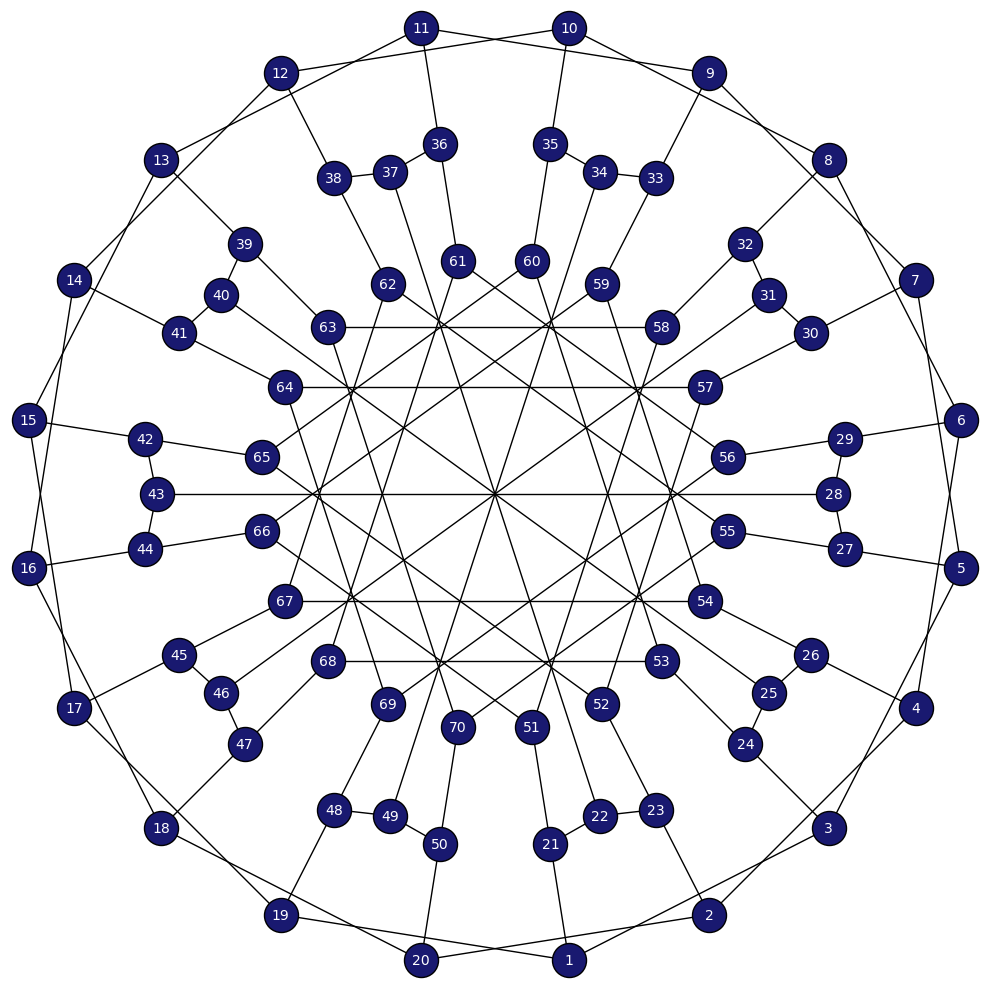

In [36]:
g = graphs.Balaban10Cage(embedding=1)

### CHANGE EMBEDDING LAYOUT ###
pos = g.get_pos()
relabels = {}

inner_vertices = [2, 48, 27, 31, 38, 42, 49, 53, 32, 8, 43, 21, 54, 58, 7, 3, 22, 26, 59, 37]
new_labels = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
for i, v in enumerate(inner_vertices):
    angle = 2 * pi * (i + 5.5) / len(inner_vertices)
    pos[v] = (3 * cos(angle), 3 * sin(angle))
    relabels[v] = new_labels[i]

indented_vertices = [5, 24, 35, 46, 29, 40, 51, 34, 45, 56]
new_labels = [28, 31, 34, 37, 40, 43, 46, 49, 22, 25]
for i, v in enumerate(indented_vertices):
    angle = 2 * pi * i / len(indented_vertices)
    pos[v] = (4.3 * cos(angle), 4.3 * sin(angle))
    relabels[v] = new_labels[i]

middle_vertices = [1, 47, 28, 30, 39, 41, 50, 52, 33, 9, 44, 20, 55, 57, 6, 4, 23, 25, 60, 36]
new_labels = [36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35]
for i, v in enumerate(middle_vertices):
    angle = 2 * pi * (i + 5.5) / len(middle_vertices)
    pos[v] = (4.5 * cos(angle), 4.5 * sin(angle))
    relabels[v] = new_labels[i]

outer_vertices = [0, 14, 69, 13, 68, 12, 67, 11, 66, 10, 65, 19, 64, 18, 63, 17, 62, 16, 61, 15,]
new_labels = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, v in enumerate(outer_vertices):
    angle = 2 * pi * (i + 5.5) / len(outer_vertices)
    pos[v] = (6 * cos(angle), 6 * sin(angle))
    relabels[v] = new_labels[i]

g.set_pos(pos)
g.relabel(relabels, inplace=True)
### CHANGE EMBEDDING LAYOUT ###

p = g.plot(
    edge_color="black", 
    vertex_size=600,
    vertex_color="midnightblue",
    transparent=True,
)
for object in p._objects:
    if isinstance(object, sage.plot.text.Text):
        object._options['rgbcolor'] = (1, 1, 1)
p.show(figsize=(10, 10))

# export as PDF
p.save("balabanlabeled.pdf", figsize=(14, 14))

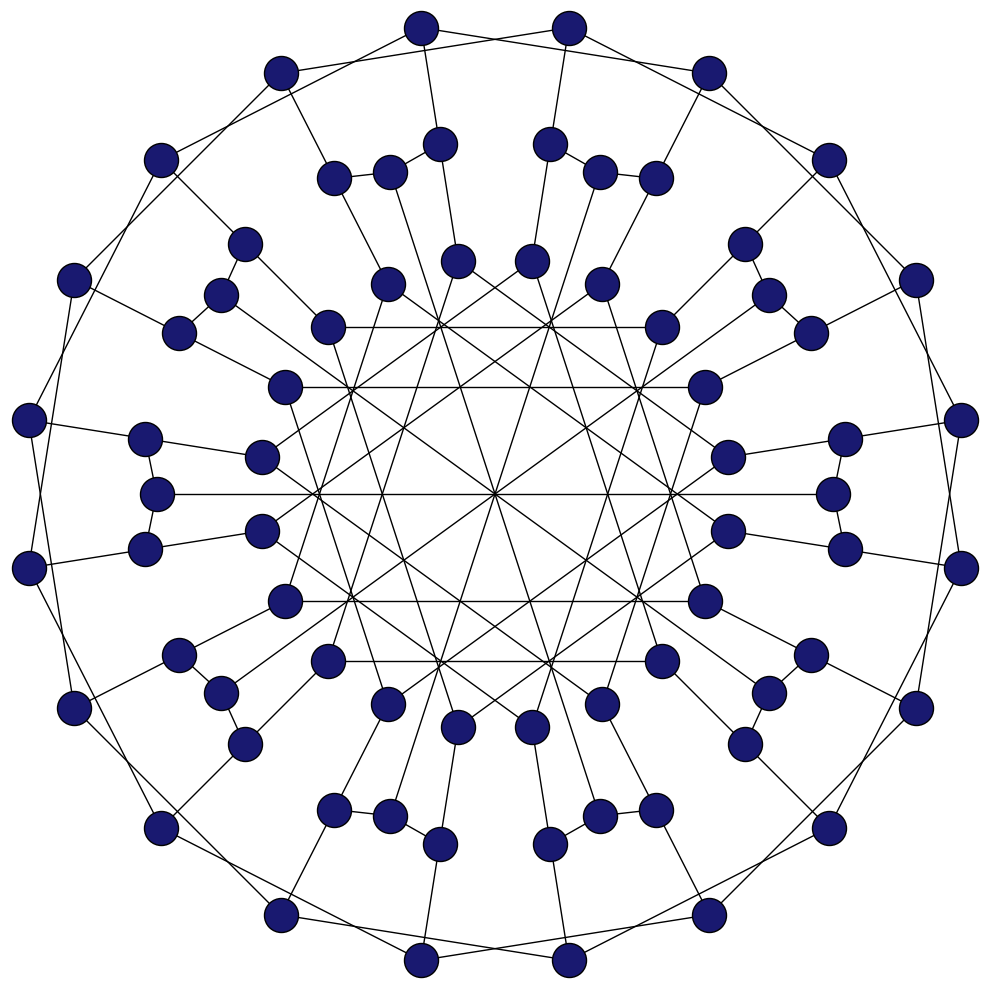

In [34]:
g = graphs.Balaban10Cage(embedding=1)

### CHANGE EMBEDDING LAYOUT ###
pos = g.get_pos()
relabels = {}

inner_vertices = [2, 48, 27, 31, 38, 42, 49, 53, 32, 8, 43, 21, 54, 58, 7, 3, 22, 26, 59, 37]
new_labels = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
for i, v in enumerate(inner_vertices):
    angle = 2 * pi * (i + 5.5) / len(inner_vertices)
    pos[v] = (3 * cos(angle), 3 * sin(angle))
    relabels[v] = new_labels[i]

indented_vertices = [5, 24, 35, 46, 29, 40, 51, 34, 45, 56]
new_labels = [28, 31, 34, 37, 40, 43, 46, 49, 22, 25]
for i, v in enumerate(indented_vertices):
    angle = 2 * pi * i / len(indented_vertices)
    pos[v] = (4.3 * cos(angle), 4.3 * sin(angle))
    relabels[v] = new_labels[i]

middle_vertices = [1, 47, 28, 30, 39, 41, 50, 52, 33, 9, 44, 20, 55, 57, 6, 4, 23, 25, 60, 36]
new_labels = [36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35]
for i, v in enumerate(middle_vertices):
    angle = 2 * pi * (i + 5.5) / len(middle_vertices)
    pos[v] = (4.5 * cos(angle), 4.5 * sin(angle))
    relabels[v] = new_labels[i]

outer_vertices = [0, 14, 69, 13, 68, 12, 67, 11, 66, 10, 65, 19, 64, 18, 63, 17, 62, 16, 61, 15,]
new_labels = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, v in enumerate(outer_vertices):
    angle = 2 * pi * (i + 5.5) / len(outer_vertices)
    pos[v] = (6 * cos(angle), 6 * sin(angle))
    relabels[v] = new_labels[i]

g.set_pos(pos)
g.relabel(relabels, inplace=True)
### CHANGE EMBEDDING LAYOUT ###

p = g.plot(
    edge_color="black", 
    vertex_size=600,
    vertex_color="midnightblue",
    transparent=True,
)
for object in p._objects:
    if isinstance(object, sage.plot.text.Text):
        object._options['rgbcolor'] = (25/255, 25/255, 112/255)
p.show(figsize=(10, 10))

# export as PDF
p.save("balabanunlabeled.pdf", figsize=(14, 14))

In [3]:
# Parametric equations for a torus; the fundamental domain is the square [0,2*pi] x [0,2*pi]
var('u,v');
a,b = 2,1 
x = (a + b*cos(u))*cos(v)
y = (a + b*cos(u))*sin(v)
z = b*sin(u)

# A parametric curve (line) in the u-v plane
var('t');
c = (2*t,3*t)

# the same curve in cartesian coordinates on the torus
s = [_.subs(dict(zip((u,v),c))) for _ in (x,y,z)]
# s[(cos(2*t) + 2)*cos(3*t), (cos(2*t) + 2)*sin(3*t), sin(2*t)]

curve = parametric_plot(s,(t,0,2*pi),color='red',thickness=2,plot_points=400)
T = parametric_plot3d([x,y,z], (u,0,2*pi),(v,0,2*pi), opacity=.6,aspect_ratio=1) 
T+curve

Graphics3d Object

In [4]:
plane_curves = [(i*2*pi/5 + 2*t,3*t) for i in range(5)]+[(i*2*pi/5 + 3*t,-2*t) for i in range(5)]
torus_curves = [[_.subs(dict(zip((u,v),c))) for _ in (x,y,z)] for c in plane_curves]
curve_plots = [parametric_plot(torus_curves[i], (t,0,2*pi), color=hue(2*i/10), thickness=4, plot_points=400) for i in range(10)]
from sage.plot.plot3d.base import Graphics3d
T + sum(curve_plots,Graphics3d())

Graphics3d Object

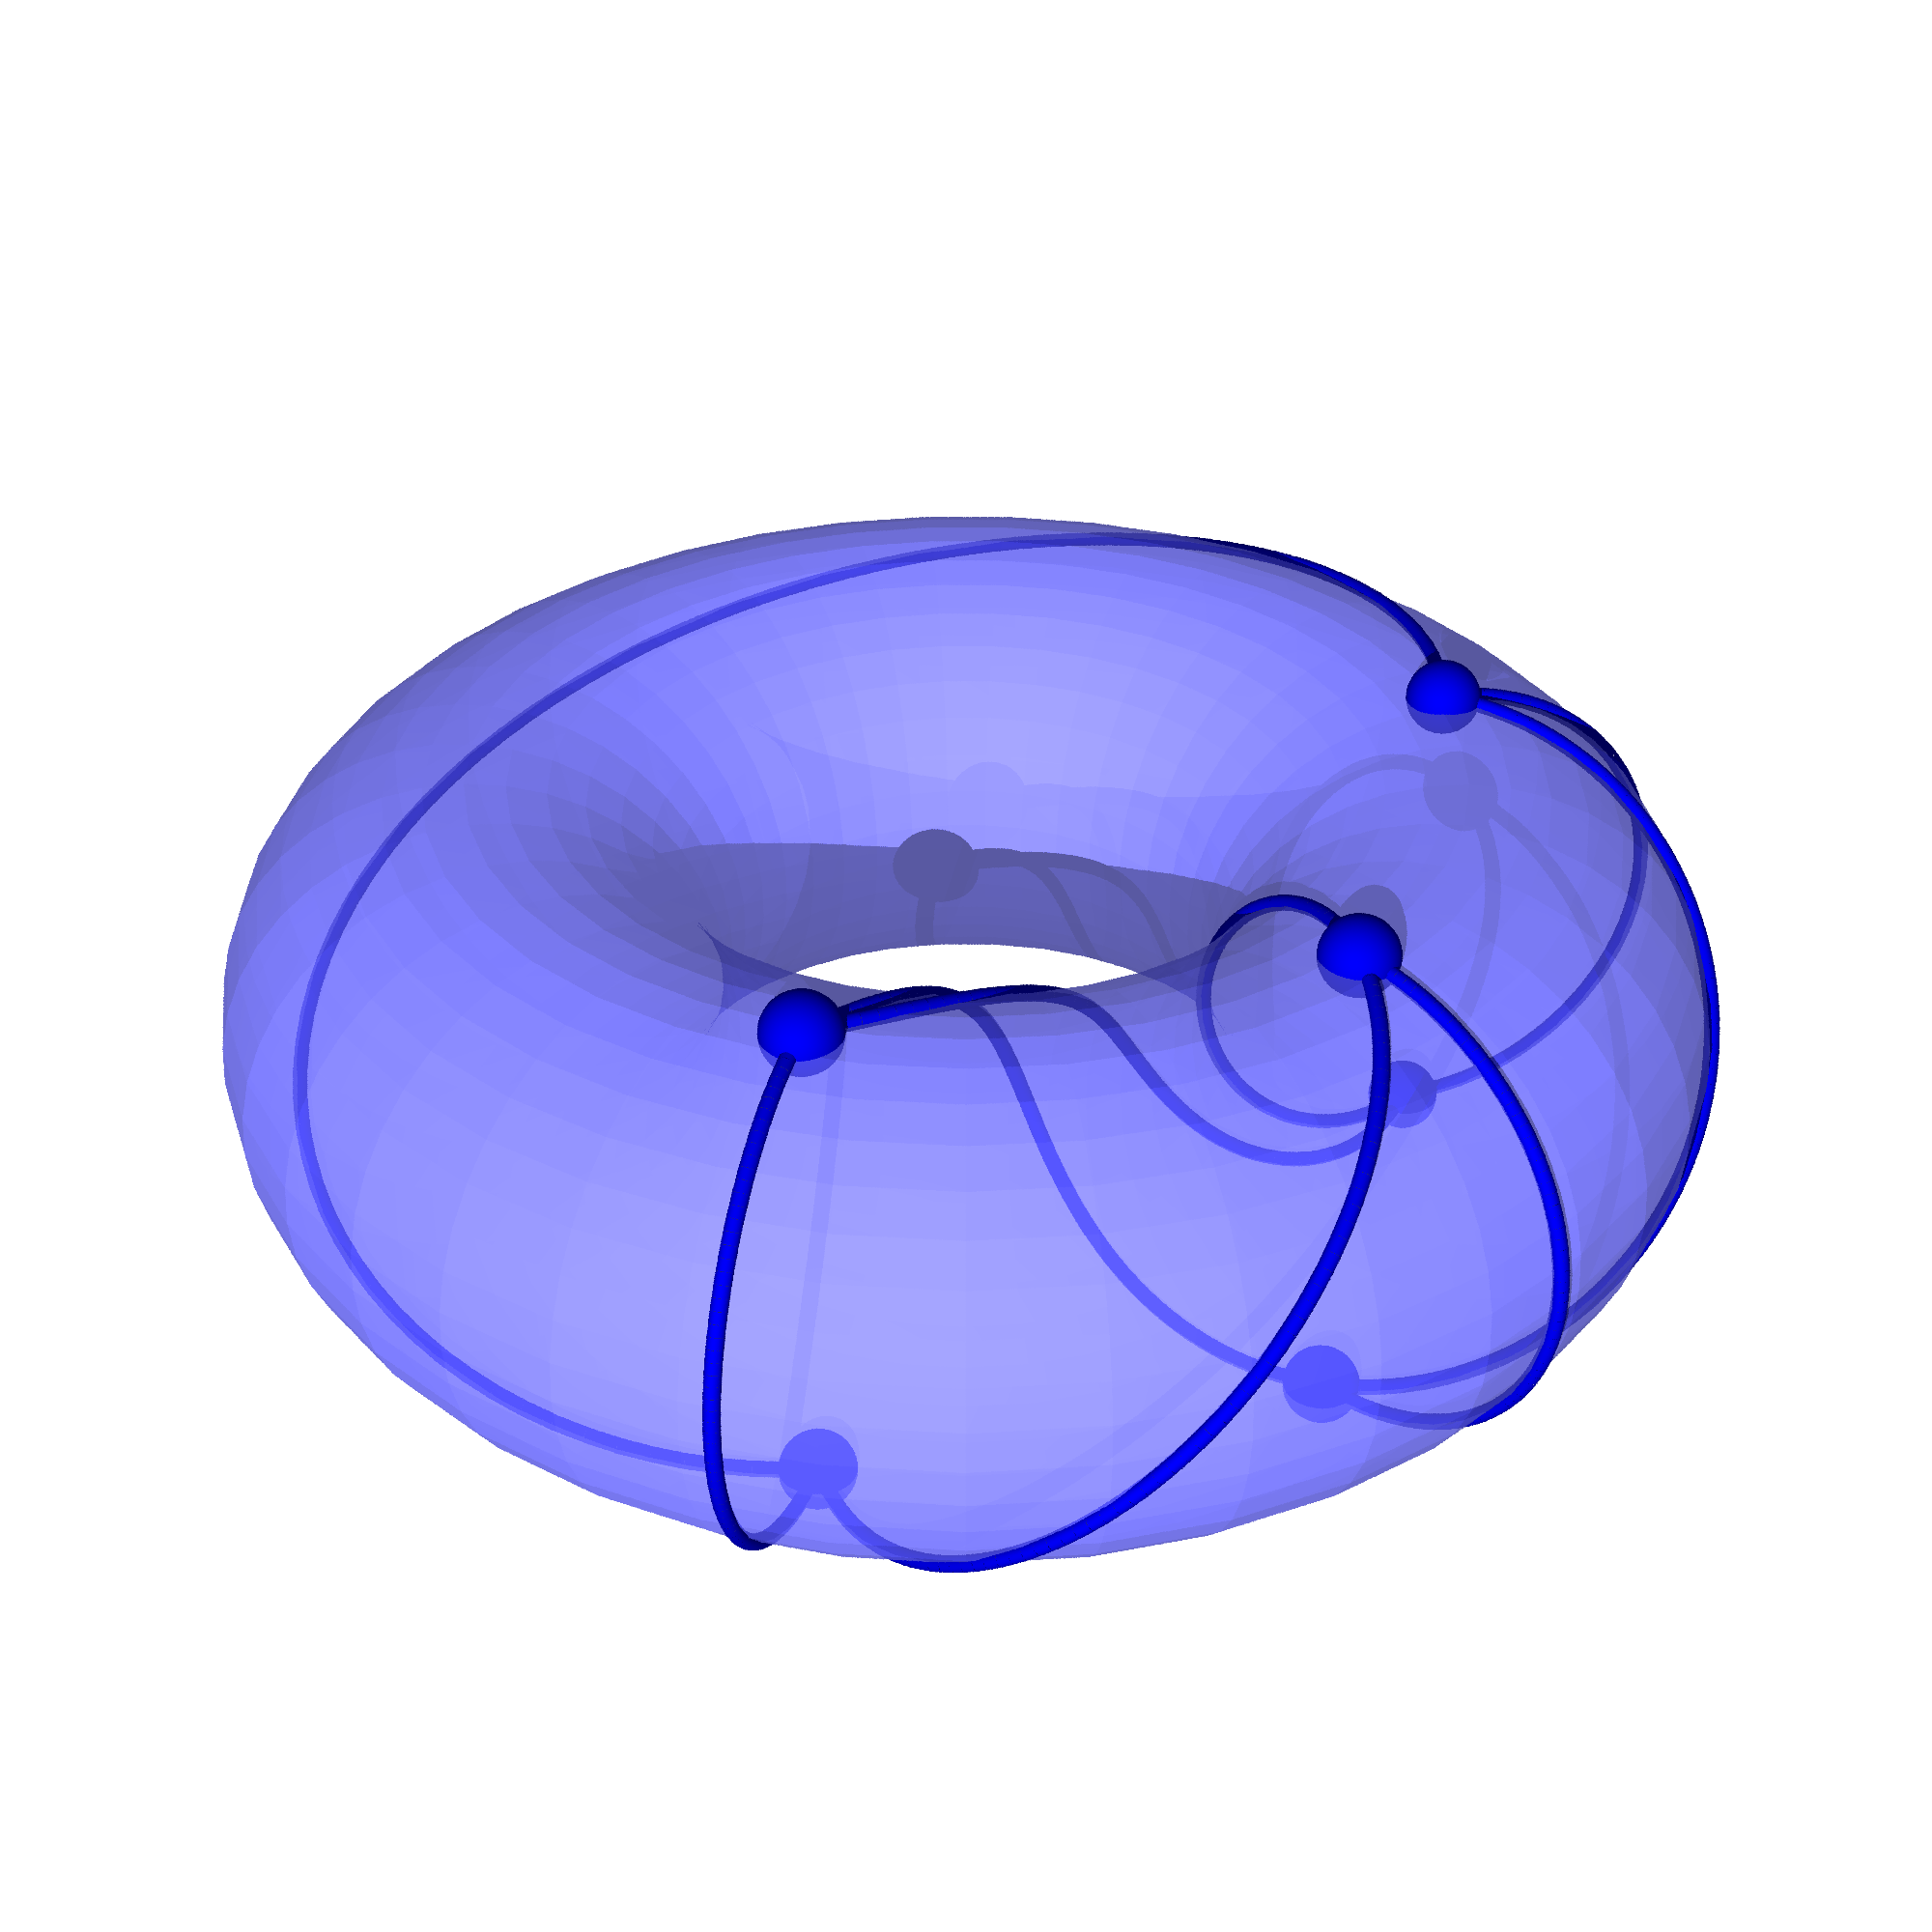

In [143]:
# Parametric equations for a torus; the fundamental domain is the square [0,2*pi] x [0,2*pi]
var('u v t');
a, b = 2, 1
x = (a + b*cos(u))*cos(v)
y = (a + b*cos(u))*sin(v)
z = b*sin(u)

# Define the positions for the vertices of the K(3,3) graph
# We choose 3 points for houses and 3 points for utilities in (u, v) coordinates
vertices_houses = [(pi/2, pi/6), (pi/2, pi/2), (pi/2, 5*pi/6)]
vertices_utilities = [(3*pi/2, pi/6), (3*pi/2, pi/2), (3*pi/2, 5*pi/6)]

# Function to convert (u, v) to 3D coordinates on the torus
def torus_coords(uh, vh):
    return ((a + b*cos(uh))*cos(vh), (a + b*cos(uh))*sin(vh), b*sin(uh))

# Define a function to plot edges along the torus surface by interpolating the (u, v) coordinates
# Optionally wrap around the outside of the torus by modifying the v-coordinate
def edge_on_torus(p1, p2, wrap_around=False, go_around=False, color='blue'):
    uh1, vh1 = p1
    uh2, vh2 = p2
    
    # Offset the coordinates to wrap around the outside of the torus if wrap_around is True
    if wrap_around:
        uh1 += pi
        uh2 += pi
    
    # Define the interpolation for the parametric coordinates (u, v)
    u_interp = (1-t)*uh1 + t*uh2
    v_interp = (1-t)*vh1 + t*vh2
    if wrap_around:
        u_interp = (1-t)*uh2 + t*uh1
    if go_around:
       v_interp = (2-2*t)*vh2 + 2*t*vh1 + 1*pi/2
    
    # Convert the interpolated (u, v) back to 3D space using the torus parametric equations
    x_interp = (a + b*cos(u_interp))*cos(v_interp)
    y_interp = (a + b*cos(u_interp))*sin(v_interp)
    z_interp = b*sin(u_interp)
    
    # Plot the edge as a parametric curve along the surface of the torus
    edge_curve = parametric_plot([x_interp, y_interp, z_interp], (t, 0, 1), color=color, thickness=2)
    return edge_curve

# Parametrize the positions of the houses and utilities on the torus
positions_houses = [torus_coords(uh, vh) for uh, vh in vertices_houses]
positions_utilities = [torus_coords(uu, vu) for uu, vu in vertices_utilities]

# Plot all edges of K(3,3), alternating between inside and outside paths
edges = []
for i, h in enumerate(vertices_houses):
    for j, r in enumerate(vertices_utilities):
        # Alternate wrapping some edges around the outside of the torus
        wrap_around = (j, i) in [(0, 0), (1, 1), (2, 2), (0, 1), (1, 2), (0, 2)]
        go_around = i == 2 and j == 0
        edges.append(edge_on_torus(h, r, wrap_around=wrap_around, go_around=go_around))

# Combine the plot of the torus and the edges
curve_edges = sum(edges)

# Add points at the vertices
points = []
for pos in positions_houses + positions_utilities:
    points.append(point3d(pos, size=10, color='blue'))  # Change color/size as needed
    # points.append(text3d(str((len(points)//2)%3), pos, color='black', scale=0.5))

# Plot the torus
T = parametric_plot3d([(a + b*cos(u))*cos(v), (a + b*cos(u))*sin(v), b*sin(u)], (u, 0, 2*pi), (v, 0, 2*pi), opacity=0.6, aspect_ratio=1)
final_plot = T + curve_edges + sum(points)

# Show the final plot
# final_plot.show(frame=False)
final_plot.show(frame=False, viewer='tachyon', shade='full', antialiasing=True, figsize=20, zoom=1.5, camera_position=[2.3, 2.4, 2.2])
